# ASSIGNMENT2 STEREO VISION

## PART-A WRITTEN EXERCISE

(a) Show that the perspective projection of a line in 3D is still a line on the image plane.

(b) Show that, under perspective projection, the vanishing points of families of parallel lines that are on the same 3D plane lie on a single 2D line (or horizon) in image. See the figure below for illustration.

![image.png](assets/hrz.png)

(c) Given the projection matrices of two stereo cameras and a pair of corresponding points (p and p’) on the image planes of two cameras, show the close-form solution for calculating the 3D scene point P that corresponds to the image points p and p’. 

## PART-B: CODING

Given five stereo image pairs, you are required to write a program with OpenCV to:

* Reconstruct the disparity map
* Estimate the relative height of two objects (you may need to segment the objects, for example, using grabcut algorithm in OpenCV.)

For each image pair, show
- Epipolar lines of any four corresponding points (15%)
- Disparity map	(15%)


The remaining 30% of marks will depend on the accuracy of relative height estimation between two objects (ratio between the objects on the left and on the right in terms of their heights).

* Pair-1: Estimate the relative height of two traffic cones. (6%)
* Pair-2: Estimate the relative height of the green box (tea) and brown box. (6%)
* Pair-3: Estimate the relative height of two books. (6%)
* Pair-4: Estimate the relative height of two bottles. (6%)
* Pair-5: Estimate the relative height of the statue and the right stone. (6%)

In [1]:
!ls ./data

1_a.jpg  2_a.jpg  3_a.jpg  4_a.jpg  5_a.jpg
1_b.jpg  2_b.jpg  3_b.jpg  4_b.jpg  5_b.jpg


In [2]:
from utils import generate_md_table

title = ['left', 'right']
items = [f'![](results/epilines/{i:d}_{x:s}_epilines.jpg)' for i in range(1, 6) for x in ['a', 'b']]
print(generate_md_table(items, title))

| left | right |
| - | - |
| ![](results/epilines/1_a_epilines.jpg) | ![](results/epilines/1_b_epilines.jpg) |
| ![](results/epilines/2_a_epilines.jpg) | ![](results/epilines/2_b_epilines.jpg) |
| ![](results/epilines/3_a_epilines.jpg) | ![](results/epilines/3_b_epilines.jpg) |
| ![](results/epilines/4_a_epilines.jpg) | ![](results/epilines/4_b_epilines.jpg) |
| ![](results/epilines/5_a_epilines.jpg) | ![](results/epilines/5_b_epilines.jpg) |



| left | right |
| - | - |
| ![](data/1_a.jpg) | ![](data/1_b.jpg) |
| ![](data/2_a.jpg) | ![](data/2_b.jpg) |
| ![](data/3_a.jpg) | ![](data/3_b.jpg) |
| ![](data/4_a.jpg) | ![](data/4_b.jpg) |
| ![](data/5_a.jpg) | ![](data/5_b.jpg) |

### B1. show epipolar lines

In [9]:
import os
from stereo_functions import get_fundamental_mat, get_sift_matches,\
                             drawlines, draw_epilines
import cv2

import numpy as np
import random

SEED=10086
np.random.seed(SEED)
random.seed(SEED)

import matplotlib.pyplot as plt

In [10]:
os.makedirs('results/epilines', exist_ok=True)

num_pts_draw = 4


for i in range(1, 6):
    left = cv2.imread(f'data/{i}_a.jpg')
    right = cv2.imread(f'data/{i}_b.jpg')
    pts1, pts2, _ = get_sift_matches(left, right)
    F, pts1_inliers, pts2_inliers = get_fundamental_mat(pts1, pts2)
    pts1_draw = pts1_inliers[:num_pts_draw]
    pts2_draw = pts2_inliers[:num_pts_draw]
    left_epi, right_epi = draw_epilines(left, right, pts1_draw, pts2_draw, F)
    
    cv2.imwrite(f'results/epilines/{i}_a_epilines.jpg', left_epi)
    cv2.imwrite(f'results/epilines/{i}_b_epilines.jpg', right_epi)


In [5]:
!ls results/epilines

1_a_epilines.jpg  2_b_epilines.jpg  4_a_epilines.jpg  5_b_epilines.jpg
1_b_epilines.jpg  3_a_epilines.jpg  4_b_epilines.jpg
2_a_epilines.jpg  3_b_epilines.jpg  5_a_epilines.jpg


| left | right |
| - | - |
| ![](results/epilines/1_a_epilines.jpg) | ![](results/epilines/1_b_epilines.jpg) |
| ![](results/epilines/2_a_epilines.jpg) | ![](results/epilines/2_b_epilines.jpg) |
| ![](results/epilines/3_a_epilines.jpg) | ![](results/epilines/3_b_epilines.jpg) |
| ![](results/epilines/4_a_epilines.jpg) | ![](results/epilines/4_b_epilines.jpg) |
| ![](results/epilines/5_a_epilines.jpg) | ![](results/epilines/5_b_epilines.jpg) |

### B2. compute depth map

Note that stereo matching algorithms provided by opencv assume you've done stereo rectification so that, the epiploar lines are horizontal, according to [Does the StereoBM class in opencv do rectification of the input images or frames? - StackOverflow](https://stackoverflow.com/questions/45855725/does-the-stereobm-class-in-opencv-do-rectification-of-the-input-images-or-frames).

OpenCV docs:

* [stereoRectifyUncalibrated()](https://docs.opencv.org/3.4.9/d9/d0c/group__calib3d.html#gaadc5b14471ddc004939471339294f052)

* [StereoSGBM](https://docs.opencv.org/3.4.9/d2/d85/classcv_1_1StereoSGBM.html)

* [StereoBM](https://docs.opencv.org/3.4.9/d9/dba/classcv_1_1StereoBM.html)

* [Disparity map post-filtering](https://docs.opencv.org/master/d3/d14/tutorial_ximgproc_disparity_filtering.html)

Other References:

* [OpenCV - Depth map from uncalibrated stereo system](https://answers.opencv.org/question/90742/opencv-depth-map-from-uncalibrated-stereo-system/)

* [Disparity Filtering Demo](http://amroamroamro.github.io/mexopencv/opencv_contrib/disparity_filtering_demo.html)

* [OpenCV disparity map is cut from left - StackOverflow](https://stackoverflow.com/questions/40040838/opencv-disparity-map-is-cut-from-left): Try to reduce the maximum disparity and/or increase the minimum disparity!

* [[Python]Stereo disparity quality problems](https://answers.opencv.org/question/182049/pythonstereo-disparity-quality-problems/)

In [4]:
import numpy as np
import cv2
from stereo_functions import get_disp_map, get_rectified_stereo
import os
import matplotlib.pyplot as plt

In [5]:
disp_dir = 'results/normalized_disparity_map'
rect_dir = 'results/rectified'

os.makedirs(rect_dir, exist_ok=True)
os.makedirs(disp_dir, exist_ok=True)

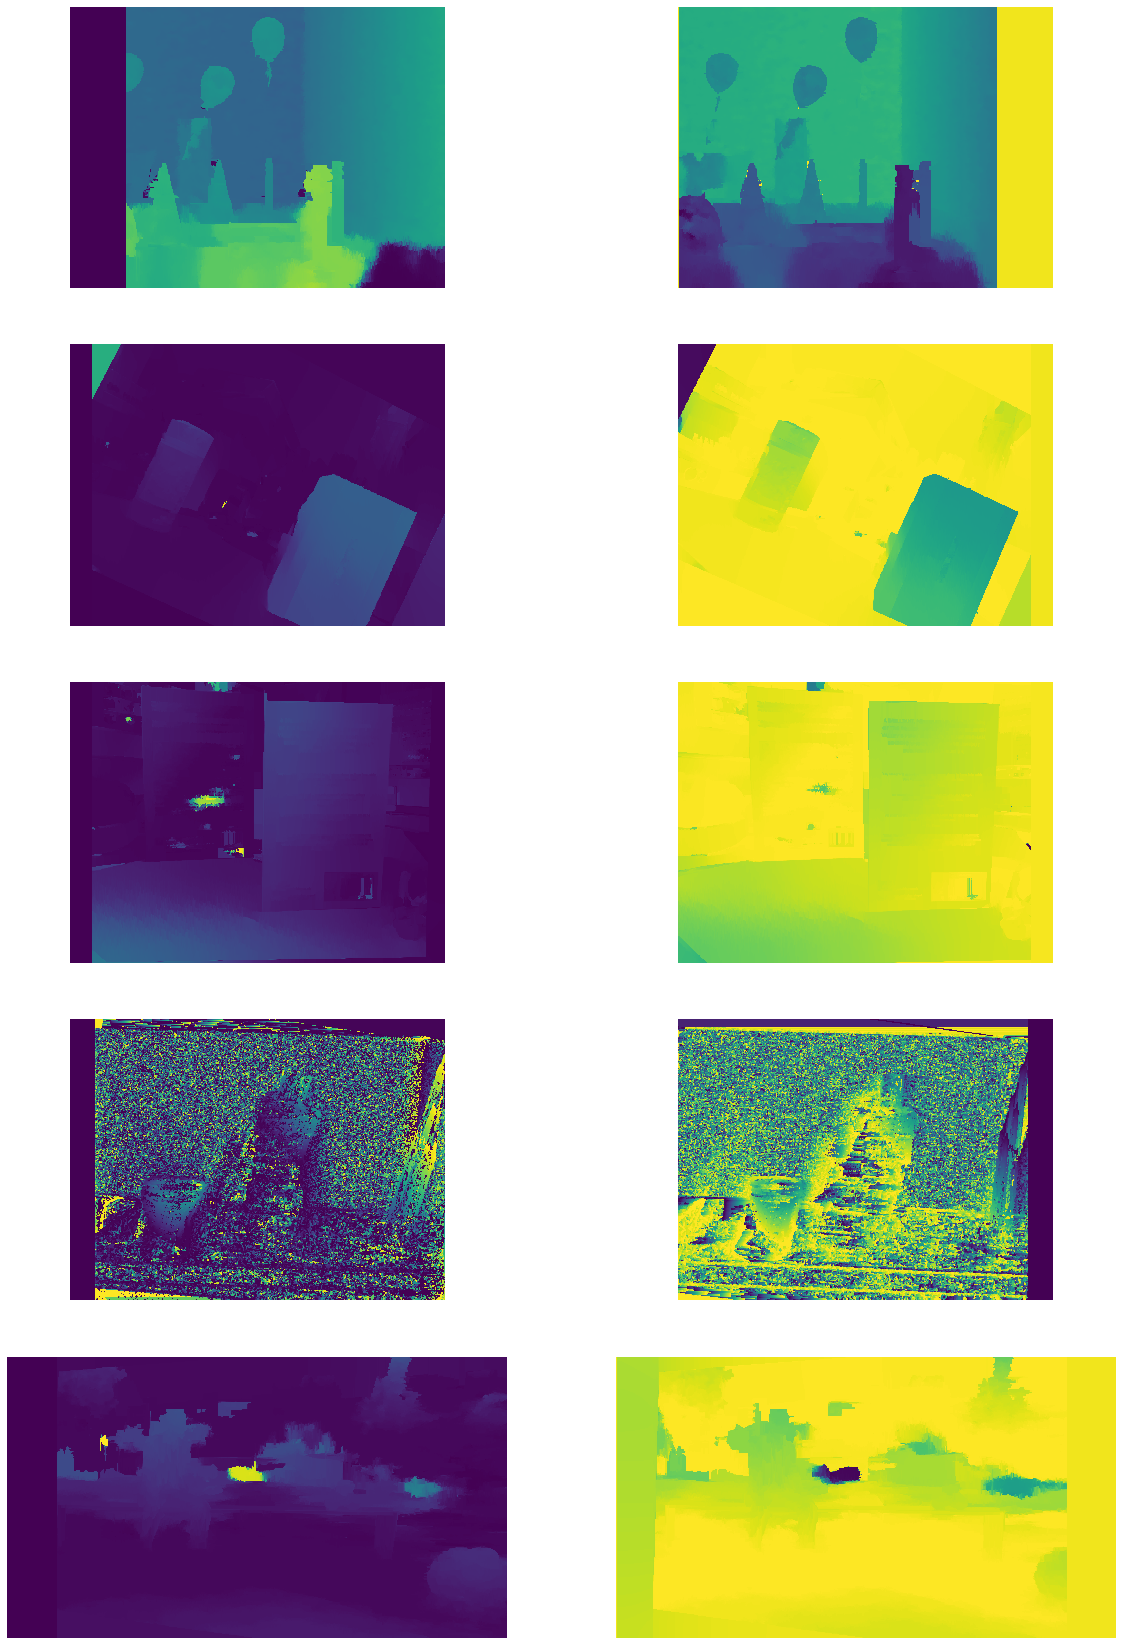

In [6]:
plt.figure(figsize=(20, 30))
n, m = 5, 2
for i in range(1, 6):
    im_left = cv2.imread(f'data/{i}_a.jpg')
    im_right = cv2.imread(f'data/{i}_b.jpg')
    if i != 1: # pair-1 is already rectified
        im_left, im_right = get_rectified_stereo(im_left, im_right)
    # since pair-4 has a textureless backgroud, we disable semiglobal matching
    # use local matching instead, and also disable filtering
    if i == 4:
        displ, dispr = get_disp_map(im_left, im_right, 96, 'bm', False)
    else:
        displ, dispr = get_disp_map(im_left, im_right, 96)
    cv2.imwrite(os.path.join(rect_dir, f'{i}_a_rect.jpg'), im_left)
    cv2.imwrite(os.path.join(rect_dir, f'{i}_b_rect.jpg'), im_right)
    cv2.imwrite(os.path.join(disp_dir, f'{i}_a_disp.jpg'), displ)
    cv2.imwrite(os.path.join(disp_dir, f'{i}_b_disp.jpg'), dispr)
    
    plt.subplot(n, m, i*2-1)
    plt.axis('off')
    plt.imshow(displ)
    plt.subplot(n, m, i*2)
    plt.axis('off')
    plt.imshow(dispr)
    

* semi-global block matching doesn't work well when backgroud is txttureless region (e.g. pair-4 and pair-5, especially pair-4), due to much mismatching.
* some techniuqes may help such cases
    - **foreground segmenation**, so we can exclude textureless backgound from block matching process
    - **deep learning**, which takes semantic feature into consideration. e.g. [GCNet](http://openaccess.thecvf.com/content_ICCV_2017/papers/Kendall_End-To-End_Learning_of_ICCV_2017_paper.pdf)

### B3. relative height estimation

## Reference

1. [Epipolar Geometry - OpenCV Tutorial](https://docs.opencv.org/3.4/da/de9/tutorial_py_epipolar_geometry.html)

2. [Open CV Stereo – Depth image generation and filtering with python 3+, ximgproc and OpenCV 3+](http://timosam.com/python_opencv_depthimage/)

3. [基本矩阵、本质矩阵和单应矩阵](https://blog.csdn.net/kokerf/article/details/72191054)